In [46]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, TargetEncoder, LabelEncoder, RobustScaler
from sklearn.tree import DecisionTreeClassifier

In [38]:
file_path = 'dataset/train.csv'

data = pd.read_csv(file_path).dropna(subset=["Genetic Disorder", "Disorder Subclass"], how='all')

columns_to_drop = ['Institute Name', 'Location of Institute', "Father's name", "Parental consent",
                   'Patient First Name', 'Family Name', 'Patient Id']
data = data.drop(columns=columns_to_drop)
# Fill missing values in 'Genetic Disorder' based on 'Disorder Subclass'
subclass_to_disorder = {
    'Leber\'s hereditary optic neuropathy': 'Mitochondrial genetic inheritance disorders',
    'Leigh syndrome': 'Mitochondrial genetic inheritance disorders',
    'Mitochondrial myopathy': 'Mitochondrial genetic inheritance disorders',
    'Alzheimer\'s': 'Multifactorial genetic inheritance disorders',
    'Cancer': 'Multifactorial genetic inheritance disorders',
    'Diabetes': 'Multifactorial genetic inheritance disorders',
    'Cystic fibrosis': 'Single-gene inheritance diseases',
    'Hemochromatosis': 'Single-gene inheritance diseases',
    'Tay-Sachs': 'Single-gene inheritance diseases',
}

data['Genetic Disorder'] = data.apply(
    lambda row: subclass_to_disorder[row['Disorder Subclass']]
    if pd.isna(row['Genetic Disorder']) else row['Genetic Disorder'],
    axis=1
)
data = data.dropna(subset=['Disorder Subclass'], how='all').drop(columns=['Genetic Disorder'])

In [39]:
numerical_features = [
    'Patient Age',
    "Mother\'s age",
    "Father\'s age",
    'No. of previous abortion',
    'White Blood cell count (thousand per microliter)',
]

categorical_features = [
    'History of anomalies in previous pregnancies',
    'Autopsy shows birth defect (if applicable)',
    'H/O substance abuse',
    'Inherited from father',
    'Maternal gene',
    'H/O serious maternal illness',
    'H/O radiation exposure (x-ray)',
    'Place of birth',
    'Birth asphyxia',
    'Respiratory Rate (breaths/min)',
    'Heart Rate (rates/min',
    'Follow-up',
    'Folic acid details (peri-conceptional)',
    'Assisted conception IVF/ART',
    'Birth defects',
    'Gender',
    'Blood test result',
    "Genes in mother's side",
    "Paternal gene",
    "Status",
    'Symptom 2',
    'Symptom 1',
    'Symptom 3',
    'Symptom 4',
    'Symptom 5',
    'Test 3',
    'Test 2',
    'Test 1',
    'Test 4',
    'Test 5',
]

target_name = "Disorder Subclass"

X = data[numerical_features + categorical_features]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data[target_name])

In [44]:
categorical_preprocessors = [
    ("drop", "drop"),
    ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)),
    (
        "one_hot",
        OneHotEncoder(handle_unknown="ignore", max_categories=20, sparse_output=False),
    ),
    ("target", TargetEncoder()),
]

In [47]:
n_cv_folds = 3
max_iter = 20
results = []


def evaluate_model_and_store(name, pipe):
    result = cross_validate(
        pipe,
        X,
        y,
        scoring="neg_root_mean_squared_error",
        cv=n_cv_folds,
        return_train_score=True,
    )
    rmse_test_score = -result["test_score"]
    rmse_train_score = -result["train_score"]
    results.append(
        {
            "preprocessor": name,
            "rmse_test_mean": rmse_test_score.mean(),
            "rmse_test_std": rmse_train_score.std(),
            "rmse_train_mean": rmse_train_score.mean(),
            "rmse_train_std": rmse_train_score.std(),
        }
    )


for name, categorical_preprocessor in categorical_preprocessors:
    preprocessor = ColumnTransformer(
        [
            ("numerical", "passthrough", numerical_features),
            ("categorical", categorical_preprocessor, categorical_features),
        ]
    )
    pipe = make_pipeline(
        # preprocessor, HistGradientBoostingRegressor(random_state=0, max_iter=max_iter),
        # preprocessor, LogisticRegression(solver="liblinear"),
        # preprocessor, GaussianNB(),
        # preprocessor, KNeighborsClassifier(n_neighbors=13),
        # preprocessor, DecisionTreeClassifier(random_state=42),
        # preprocessor, RandomForestClassifier(random_state=42, verbose=False),
        preprocessor, KNNImputer(n_neighbors=5), RobustScaler(), GradientBoostingClassifier(verbose=False)
    )
    evaluate_model_and_store(name, pipe)


ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/home/nicogusuarez/Documents/.venvs/ML/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/nicogusuarez/Documents/.venvs/ML/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/nicogusuarez/Documents/.venvs/ML/lib/python3.10/site-packages/sklearn/pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/nicogusuarez/Documents/.venvs/ML/lib/python3.10/site-packages/sklearn/pipeline.py", line 377, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/nicogusuarez/Documents/.venvs/ML/lib/python3.10/site-packages/joblib/memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
  File "/home/nicogusuarez/Documents/.venvs/ML/lib/python3.10/site-packages/sklearn/pipeline.py", line 957, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/nicogusuarez/Documents/.venvs/ML/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 157, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/nicogusuarez/Documents/.venvs/ML/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/nicogusuarez/Documents/.venvs/ML/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py", line 754, in fit_transform
    result = self._fit_transform(X, y, _fit_transform_one)
  File "/home/nicogusuarez/Documents/.venvs/ML/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py", line 681, in _fit_transform
    return Parallel(n_jobs=self.n_jobs)(
  File "/home/nicogusuarez/Documents/.venvs/ML/lib/python3.10/site-packages/sklearn/utils/parallel.py", line 65, in __call__
    return super().__call__(iterable_with_config)
  File "/home/nicogusuarez/Documents/.venvs/ML/lib/python3.10/site-packages/joblib/parallel.py", line 1863, in __call__
    return output if self.return_generator else list(output)
  File "/home/nicogusuarez/Documents/.venvs/ML/lib/python3.10/site-packages/joblib/parallel.py", line 1792, in _get_sequential_output
    res = func(*args, **kwargs)
  File "/home/nicogusuarez/Documents/.venvs/ML/lib/python3.10/site-packages/sklearn/utils/parallel.py", line 127, in __call__
    return self.function(*args, **kwargs)
  File "/home/nicogusuarez/Documents/.venvs/ML/lib/python3.10/site-packages/sklearn/pipeline.py", line 957, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/nicogusuarez/Documents/.venvs/ML/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 157, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/nicogusuarez/Documents/.venvs/ML/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/nicogusuarez/Documents/.venvs/ML/lib/python3.10/site-packages/sklearn/preprocessing/_target_encoder.py", line 230, in fit_transform
    X_ordinal, X_known_mask, y, n_categories = self._fit_encodings_all(X, y)
  File "/home/nicogusuarez/Documents/.venvs/ML/lib/python3.10/site-packages/sklearn/preprocessing/_target_encoder.py", line 306, in _fit_encodings_all
    raise ValueError(
ValueError: Unknown label type: Target type was inferred to be 'multiclass'. Only ('binary', 'continuous') are supported.


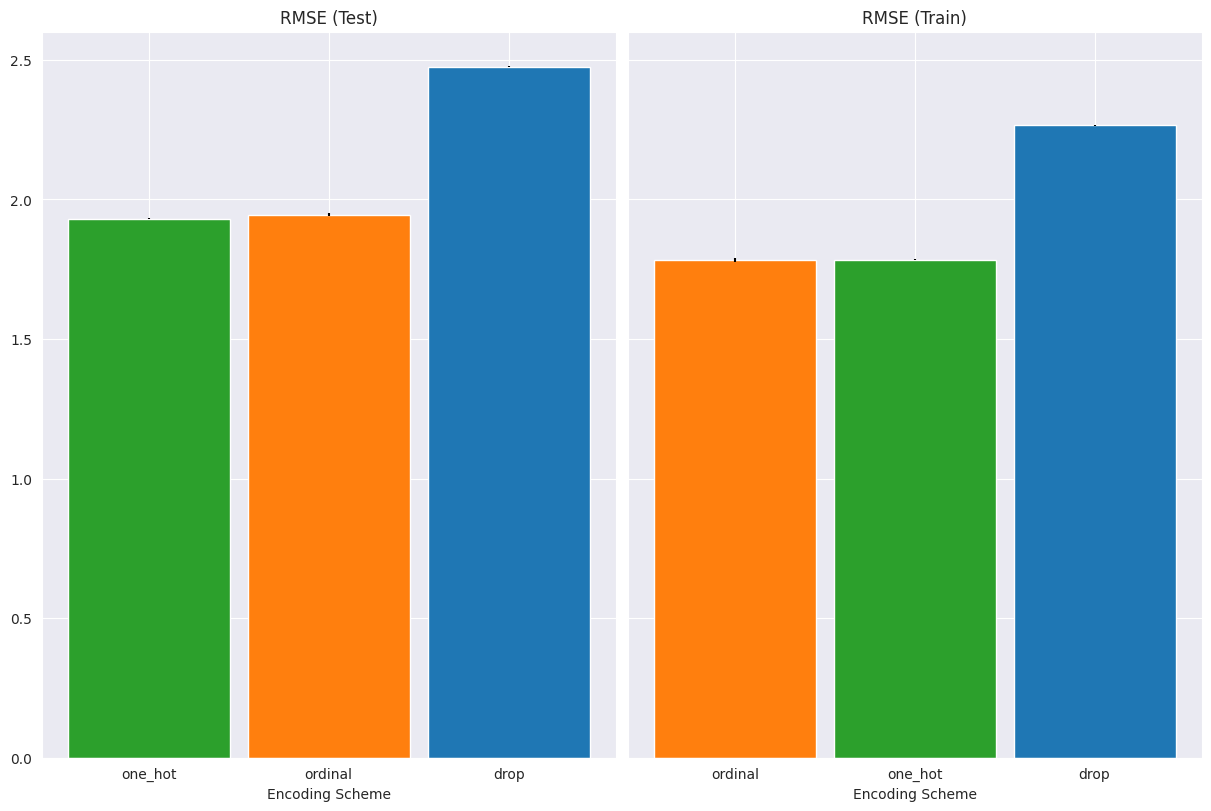

In [48]:
results_df = (
    pd.DataFrame(results).set_index("preprocessor").sort_values("rmse_test_mean")
)

fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(12, 8), sharey=True, constrained_layout=True
)
xticks = range(len(results_df))
name_to_color = dict(
    zip((r["preprocessor"] for r in results), ["C0", "C1", "C2", "C3", "C4"])
)

for subset, ax in zip(["test", "train"], [ax1, ax2]):
    mean, std = f"rmse_{subset}_mean", f"rmse_{subset}_std"
    data = results_df[[mean, std]].sort_values(mean)
    ax.bar(
        x=xticks,
        height=data[mean],
        yerr=data[std],
        width=0.9,
        color=[name_to_color[name] for name in data.index],
    )
    ax.set(
        title=f"RMSE ({subset.title()})",
        xlabel="Encoding Scheme",
        xticks=xticks,
        xticklabels=data.index,
    )
